In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [125]:
df = pd.read_csv("insurance1.csv")

In [126]:
df

,age,height,weight,premium
0,25,162.56,70,18000
1,30,172.72,95,38000
2,35,167.64,78,38000
3,40,171.00,110,60000
4,45,157.48,85,70000


In [127]:
# dependent and independent variable
x = df.iloc[:,0:3]

In [128]:
x

,age,height,weight
0,25,162.56,70
1,30,172.72,95
2,35,167.64,78
3,40,171.00,110
4,45,157.48,85


In [129]:
y = df.iloc[:,-1]

In [130]:
y

0    18000
1    38000
2    38000
3    60000
4    70000
Name: premium, dtype: int64

In [152]:
#split into train and test

from sklearn.model_selection import train_test_split

x_trian,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3 )

In [154]:
x_trian

,age,height,weight
3,40,171.00,110
2,35,167.64,78
1,30,172.72,95


In [155]:
x_test


,age,height,weight
0,25,162.56,70
4,45,157.48,85


In [156]:
y_train

3    60000
2    38000
1    38000
Name: premium, dtype: int64

In [157]:
y_test

0    18000
4    70000
Name: premium, dtype: int64

In [158]:
# Standardising the dataset
from sklearn.preprocessing import StandardScaler


In [159]:
scalor = StandardScaler()

In [160]:
x_trian = scalor.fit_transform(x_trian)

In [161]:
x_trian

array([[ 1.22474487,  0.25913062,  1.19844937],
       [ 0.        , -1.33357465, -1.24944721],
       [-1.22474487,  1.07444403,  0.05099785]])

In [162]:
x_test = scalor.transform(x_test)

In [163]:
x_test

array([[-2.44948974, -3.74159333, -1.86142136],
       [ 2.44948974, -6.14961201, -0.71396984]])

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:

lg = LinearRegression()

In [166]:
# train the model
lg.fit(x_trian, y_train)


LinearRegression()

In [167]:
## find the mean squre error
from sklearn.model_selection import cross_val_score

In [168]:
# prediction

reg_predict = lg.predict(x_test)
reg_predict

array([17703.8721142 , 55138.79857856])

In [169]:
y_test

0    18000
4    70000
Name: premium, dtype: int64

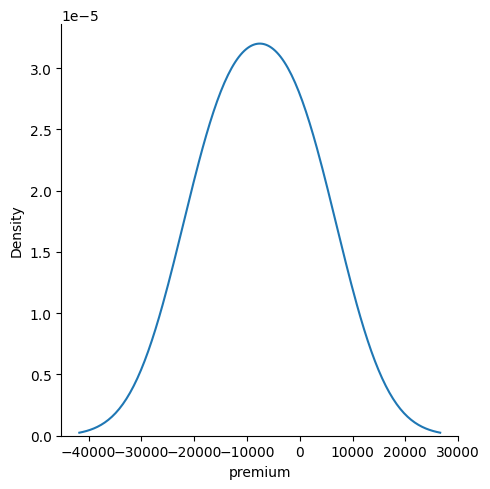

In [170]:
## 
import seaborn as sns
sns.displot(reg_predict-y_test, kind='kde')

In [171]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [172]:
r2_score(y_test, reg_predict)

0.8365806217356125

In [173]:
print('R2 score ', r2_score(y_test,reg_predict))
print('MAE ', mean_absolute_error(y_test,reg_predict))
print('MSE ', mean_squared_error(y_test,reg_predict))

R2 score  0.8365806217356125
MAE  7578.66465362362
MSE  110471499.70672593
